# Quantifications and Comparisons of Food Access in Various US Cities
## Amanda Stark, Aayush Joshipura, Danny Heinrichs
## DS2001 Jorio Cocola

With this project, we aimed to use data analysis to quantify the effects of food deserts on people in different urban populations across the USA.  We started with a huge excel file (converted to CSV) showing census data of food deserts & population characteristics.

In [25]:
# import dataset using pandas
import pandas as pd 


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

FILE_NAME = 'foodresearchatlas.csv'
df = pd.read_csv(FILE_NAME)

In [26]:
df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,3326,1317,0,57,0.017138,0,...,593,3106,6,15,0,27,172,309,56,116
72860,56043000301,Wyoming,Washakie,1,2665,1154,0,10,0.003752,0,...,399,2377,5,23,0,40,220,446,114,124
72861,56043000302,Wyoming,Washakie,1,2542,1021,0,73,0.028717,0,...,516,2312,11,10,1,26,182,407,82,97
72862,56045951100,Wyoming,Weston,0,3314,1322,0,252,0.076041,0,...,499,3179,15,10,1,47,62,91,108,50


We kept columns of the census tracts, states and counties (to find cities), population, number of food deserts, population in food deserts, and low income population in food deserts.

In [27]:
keep_columns = ['CensusTract','State','County','POP2010',
'LILATracts_1And10','LAPOP1_10', 'LALOWI1_10']

df = df[keep_columns] #new df is only keep_columns
df

,CensusTract,State,County,POP2010,LILATracts_1And10,LAPOP1_10,LALOWI1_10
0,1001020100,Alabama,Autauga,1912,0,1357.480940,322.084612
1,1001020200,Alabama,Autauga,2170,0,483.429683,145.141418
2,1001020300,Alabama,Autauga,3373,0,1417.874893,696.636797
3,1001020400,Alabama,Autauga,4386,0,1363.466885,409.587836
4,1001020500,Alabama,Autauga,10766,0,2643.095161,623.076555
...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,3326,0,901.906926,299.381771
72860,56043000301,Wyoming,Washakie,2665,0,0.000000,0.000000
72861,56043000302,Wyoming,Washakie,2542,0,155.339557,60.252231
72862,56045951100,Wyoming,Weston,3314,0,849.501114,160.237408


We defined each urban area as by county because that should cover people who live and work in each city of interest.

In [28]:
# Creating new data frames for each city

boston = df[df["State"] == "Massachusetts"]
boston = boston[boston["County"]=="Suffolk"]

atlanta = df[df["State"] == "Georgia"]
atlanta = atlanta[atlanta["County"]=="Fulton"]

chicago = df[df["State"] == "Illinois"]
chicago = chicago[chicago["County"]=="Cook"]

losangeles = df[df["State"] == "California"]
losangeles = losangeles[losangeles["County"]=="Los Angeles"]

sanfrancisco = df[df["State"] == "California"]
sanfrancisco = sanfrancisco[sanfrancisco["County"]=="San Francisco"]

philadelphia = df[df["State"] == "Pennsylvania"]
philadelphia = philadelphia[philadelphia["County"]=="Philadelphia"]

pittsburgh = df[df["State"] == "Pennsylvania"]
pittsburgh = pittsburgh[pittsburgh["County"]=="Allegheny"]

phoenix = df[df["State"] == "Arizona"]
phoenix = phoenix[phoenix["County"]=="Maricopa"]

dallas = df[df["State"] == "Texas"]
dallas = dallas[dallas["County"]=="Dallas"]

columbus = df[df["State"] == "Ohio"]
columbus = columbus[columbus["County"]=="Franklin"]

seattle = df[df["State"] == "Washington"]
seattle = seattle[seattle["County"]=="King"]

portland = df[df["State"] == "Oregon"]
portland = portland[portland["County"]=="Multnomah"]

denver = df[df["State"] == "Colorado"]
denver = denver[denver["County"]=="Denver"]

baltimore = df[df["State"] == "Maryland"]
baltimore = baltimore[baltimore["County"]=="Baltimore"]

detroit = df[df["State"] == "Michigan"]
detroit = detroit[detroit["County"]=="Wayne"]

austin = df[df["State"] == "Texas"]
austin = austin[austin["County"]=="Travis"]

indianapolis = df[df["State"] == "Indiana"]
indianapolis = indianapolis[indianapolis["County"]=="Marion"]

lasvegas = df[df["State"] == "Nevada"]
lasvegas = lasvegas[lasvegas["County"]=="Clark"]

louisville = df[df["State"] == "Kentucky"]
louisville = louisville[louisville["County"]=="Jefferson"]

milwaukee = df[df["State"] == "Wisconsin"]
milwaukee = milwaukee[milwaukee["County"]=="Milwaukee"]

charlotte = df[df["State"] == "North Carolina"]
charlotte = charlotte[charlotte["County"]=="Mecklenburg"]

# Displaying Boston 
boston

,CensusTract,State,County,POP2010,LILATracts_1And10,LAPOP1_10,LALOWI1_10
32225,25025000100,Massachusetts,Suffolk,4254,0,0.0,0.0
32226,25025000201,Massachusetts,Suffolk,3854,0,0.0,0.0
32227,25025000202,Massachusetts,Suffolk,3885,0,0.0,0.0
32228,25025000301,Massachusetts,Suffolk,2740,0,0.0,0.0
32229,25025000302,Massachusetts,Suffolk,3142,0,0.0,0.0
...,...,...,...,...,...,...,...
32424,25025981502,Massachusetts,Suffolk,9,0,0.0,0.0
32425,25025981600,Massachusetts,Suffolk,0,0,0.0,0.0
32426,25025981700,Massachusetts,Suffolk,0,0,0.0,0.0
32427,25025981800,Massachusetts,Suffolk,82,0,0.0,0.0


## Make new dataframe to analyze differences in food desert statisitcs in different cities

In [29]:
def total(city_name, column_name):
    """ find the total of a column """
    total = city_name[column_name].sum()
    return total

In [30]:
data = {"Cities":  ["Chicago", "Boston", "Atlanta", "Los Angeles", "San Francisco", "Philadelphia", "Pittsburgh", "Phoenix", "Dallas", "Columbus", "Seattle", "Portland", "Denver", "Baltimore", "Detroit", "Austin", "Indianapolis", "Las Vegas", "Louisville", "Milwaukee", "Charlotte"],
        "Pop": [total(chicago, "POP2010"), total(boston, "POP2010"), total(atlanta, "POP2010"), total(losangeles, "POP2010"), total(sanfrancisco, "POP2010"), total(philadelphia, "POP2010"), total(pittsburgh, "POP2010"), total(phoenix, "POP2010"), total(dallas, "POP2010"), total(columbus, "POP2010"), total(seattle, "POP2010"), total(portland, "POP2010"), total(denver, "POP2010"), total(baltimore, "POP2010"), total(detroit, "POP2010"), total(austin, "POP2010"), total(indianapolis, "POP2010"), total(lasvegas, "POP2010"), total(louisville, "POP2010"), total(milwaukee, "POP2010"), total(charlotte, "POP2010")],
        "NumFD": [total(chicago, "LILATracts_1And10"), total(boston, "LILATracts_1And10"), total(atlanta, "LILATracts_1And10"), total(losangeles, "LILATracts_1And10"), total(sanfrancisco, "LILATracts_1And10"), total(philadelphia, "LILATracts_1And10"), total(pittsburgh, "LILATracts_1And10"), total(phoenix, "LILATracts_1And10"), total(dallas, "LILATracts_1And10"), total(columbus, "LILATracts_1And10"), total(seattle, "LILATracts_1And10"), total(portland, "LILATracts_1And10"), total(denver, "LILATracts_1And10"), total(baltimore, "LILATracts_1And10"), total(detroit, "LILATracts_1And10"), total(austin, "LILATracts_1And10"), total(indianapolis, "LILATracts_1And10"), total(lasvegas, "LILATracts_1And10"), total(louisville, "LILATracts_1And10"), total(milwaukee, "LILATracts_1And10"), total(charlotte, "LILATracts_1And10")],
        "PopFD": [total(chicago, "LAPOP1_10"), total(boston, "LAPOP1_10"), total(atlanta, "LAPOP1_10"), total(losangeles, "LAPOP1_10"), total(sanfrancisco, "LAPOP1_10"), total(philadelphia, "LAPOP1_10"), total(pittsburgh, "LAPOP1_10"), total(phoenix, "LAPOP1_10"), total(dallas, "LAPOP1_10"), total(columbus, "LAPOP1_10"), total(seattle, "LAPOP1_10"), total(portland, "LAPOP1_10"), total(denver, "LAPOP1_10"), total(baltimore, "LAPOP1_10"), total(detroit, "LAPOP1_10"), total(austin, "LAPOP1_10"), total(indianapolis, "LAPOP1_10"), total(lasvegas, "LAPOP1_10"), total(louisville, "LAPOP1_10"), total(milwaukee, "LAPOP1_10"), total(charlotte, "LAPOP1_10")],
        "LIPopFD": [total(chicago, "LALOWI1_10"), total(boston, "LALOWI1_10"), total(atlanta, "LALOWI1_10"), total(losangeles, "LALOWI1_10"), total(sanfrancisco, "LALOWI1_10"), total(philadelphia, "LALOWI1_10"), total(pittsburgh, "LALOWI1_10"), total(phoenix, "LALOWI1_10"), total(dallas, "LALOWI1_10"), total(columbus, "LALOWI1_10"), total(seattle, "LALOWI1_10"), total(portland, "LALOWI1_10"), total(denver, "LALOWI1_10"), total(baltimore, "LALOWI1_10"), total(detroit, "LALOWI1_10"), total(austin, "LALOWI1_10"), total(indianapolis, "LALOWI1_10"), total(lasvegas, "LALOWI1_10"), total(louisville, "LALOWI1_10"), total(milwaukee, "LALOWI1_10"), total(charlotte, "LALOWI1_10")]
        }

food_deserts = pd.DataFrame (data, columns = ["Cities", "Pop", "NumFD","PopFD", "LIPopFD"])

food_deserts

,Cities,Pop,NumFD,PopFD,LIPopFD
0,Chicago,5194675,44,389469.982066,91509.520691
1,Boston,722023,2,6320.114984,1736.673334
2,Atlanta,920581,40,278665.123167,90844.643739
3,Los Angeles,9818605,67,682406.657989,173293.801453
4,San Francisco,805235,3,4865.485435,2861.099906
5,Philadelphia,1526006,6,18760.347815,7273.957755
6,Pittsburgh,1223348,31,320519.527606,69569.439206
7,Phoenix,3817117,98,755125.426469,217897.338562
8,Dallas,2368139,88,426464.713793,171772.383429
9,Columbus,1163414,49,298837.617755,91570.367258


In [31]:
# food_deserts = {}

# food_deserts["Chicago"] = total(chicago, "LILATracts_1And10")
# food_deserts["Boston"] = total(chicago, "LILATracts_1And10")
# food_deserts["Atlanta"] = total(atlanta, "LILATracts_1And10")
# food_deserts["Los Angeles"] = total(losangeles, "LILATracts_1And10")
# food_deserts["San Francisco"] = total(sanfrancisco, "LILATracts_1And10")
# food_deserts["Philadelphia"] = total(philadelphia, "LILATracts_1And10")
# food_deserts["Pittsburgh"] = total(pittsburgh, "LILATracts_1And10")

## Graphs to visualize data to better serve people in food deserts in cities across the US

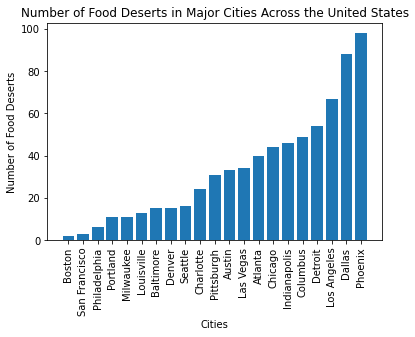

In [32]:
food_deserts = food_deserts.sort_values("NumFD")
plt.bar(food_deserts.Cities,food_deserts.NumFD)
plt.xticks(rotation='vertical')
plt.title('Number of Food Deserts in Major Cities Across the United States')
plt.xlabel('Cities')
plt.ylabel('Number of Food Deserts')
plt.show()

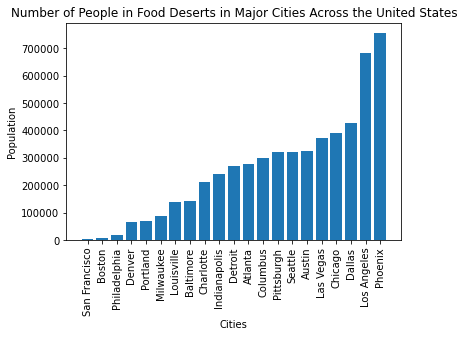

In [33]:
food_deserts = food_deserts.sort_values("PopFD")
plt.bar(food_deserts.Cities,food_deserts.PopFD)
plt.xticks(rotation='vertical')
plt.title('Number of People in Food Deserts in Major Cities Across the United States')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.show()

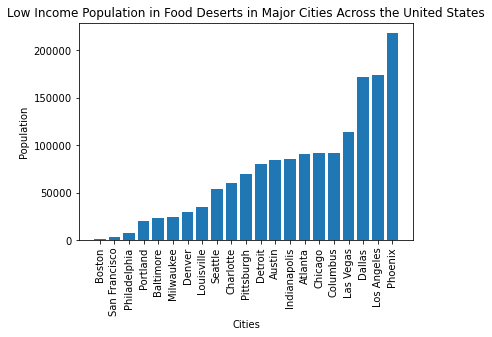

In [34]:
food_deserts = food_deserts.sort_values("LIPopFD")
plt.bar(food_deserts.Cities,food_deserts.LIPopFD)
plt.xticks(rotation='vertical')
plt.title('Low Income Population in Food Deserts in Major Cities Across the United States')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.show()

In [35]:
# Create a new column with percent of population in FD
food_deserts["PopFDPercent"] = food_deserts["PopFD"] / food_deserts["Pop"]
food_deserts

,Cities,Pop,NumFD,PopFD,LIPopFD,PopFDPercent
1,Boston,722023,2,6320.114984,1736.673334,0.008753
4,San Francisco,805235,3,4865.485435,2861.099906,0.006042
5,Philadelphia,1526006,6,18760.347815,7273.957755,0.012294
11,Portland,735334,11,70809.824043,20304.158484,0.096296
13,Baltimore,805029,15,143563.920627,23634.869213,0.178334
19,Milwaukee,947735,11,89959.753948,24599.895236,0.094921
12,Denver,600158,15,67255.949023,30166.846981,0.112064
18,Louisville,741096,13,139009.039279,34653.117787,0.187572
10,Seattle,1931249,16,321786.818854,53870.402650,0.166621
20,Charlotte,919628,24,213596.478670,60250.394026,0.232264


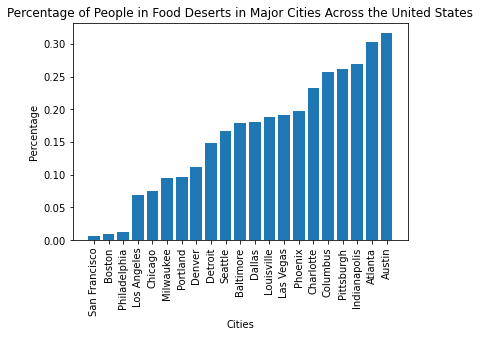

In [36]:
food_deserts = food_deserts.sort_values("PopFDPercent")
plt.bar(food_deserts.Cities,food_deserts.PopFDPercent)
plt.xticks(rotation='vertical')
plt.title('Percentage of People in Food Deserts in Major Cities Across the United States')
plt.xlabel('Cities')
plt.ylabel('Percentage')
plt.show()

In [37]:
# Create a new column with percent of population in FD that are low income
food_deserts["LIFDPercent"] = food_deserts["LIPopFD"] / food_deserts["PopFD"]
food_deserts

,Cities,Pop,NumFD,PopFD,LIPopFD,PopFDPercent,LIFDPercent
4,San Francisco,805235,3,4865.485435,2861.099906,0.006042,0.588040
1,Boston,722023,2,6320.114984,1736.673334,0.008753,0.274785
5,Philadelphia,1526006,6,18760.347815,7273.957755,0.012294,0.387730
3,Los Angeles,9818605,67,682406.657989,173293.801453,0.069501,0.253945
0,Chicago,5194675,44,389469.982066,91509.520691,0.074975,0.234959
19,Milwaukee,947735,11,89959.753948,24599.895236,0.094921,0.273454
11,Portland,735334,11,70809.824043,20304.158484,0.096296,0.286742
12,Denver,600158,15,67255.949023,30166.846981,0.112064,0.448538
14,Detroit,1820584,54,270654.657006,80257.150263,0.148664,0.296530
10,Seattle,1931249,16,321786.818854,53870.402650,0.166621,0.167410


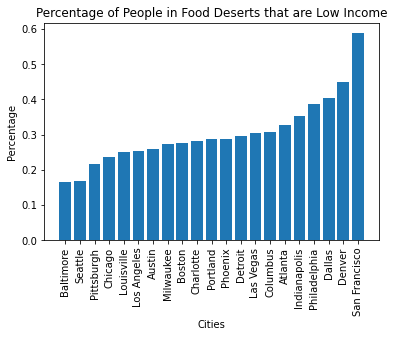

In [38]:
food_deserts = food_deserts.sort_values("LIFDPercent")
plt.bar(food_deserts.Cities,food_deserts.LIFDPercent)
plt.xticks(rotation='vertical')
plt.title('Percentage of People in Food Deserts that are Low Income')
plt.xlabel('Cities')
plt.ylabel('Percentage')
plt.show()

## Focusing on Grocery Store Locations in Baltimore

In [39]:
# reading the file
file2 = 'Grocery_Stores.csv'
df2 = pd.read_csv(file2)
df2.head()

,name,type,zipCode,neighborhood,councilDistrict,policeDistrict,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,SAVE-A-LOT,Limited Supermarket,21217,Bolton Hill,11,CENTRAL,"250 MCMECHEN st\nBaltimore, MD",NaN,NaN,NaN
1,ALDI,Limited Supermarket,21215,Ashburton,6,NORTHWESTERN,"3601 COLD SPRING LN\nBaltimore, MD",NaN,NaN,NaN
2,ALDI (A.K.A. 3000 ATCO AVENUE),Limited Supermarket,21230,Morrell Park,10,SOUTHWESTERN,"3140 WASHINGTON BLVD\nBaltimore, MD",NaN,NaN,NaN
3,SAVE A LOT OF FELLS POINT,Limited Supermarket,21231,Fells Point,1,SOUTHEASTERN,"517 BROADWAY\nBaltimore, MD",NaN,NaN,NaN
4,"SAFEWAY, INC.",Full Supermarket,21218,Charles Village,12,NORTHERN,"2401 CHARLES ST\nBaltimore, MD",NaN,NaN,NaN


In [40]:
# cleaning the data
## Removing Columns with null data
keep_columns2 = ['name','type','zipCode','neighborhood',
'councilDistrict',
'policeDistrict','Location 1']

df2 = df2[keep_columns2] #new df is only keep_columns
df2.head()
## Preparing the adresses (Location 1)
### funtion to remove \n
def rem_characters(line, characters = '\n'):
    line2 = line.replace(characters, ' ')
    return line2

### applying the function to each line in the column and adding the cleaned addresses into the dataframe
addresses = []
for address in df2["Location 1"]:
    address = rem_characters(address)
    addresses.append(address)
    
df2.insert(7, "addresses", addresses)

df2.head()


,name,type,zipCode,neighborhood,councilDistrict,policeDistrict,Location 1,addresses
0,SAVE-A-LOT,Limited Supermarket,21217,Bolton Hill,11,CENTRAL,"250 MCMECHEN st\nBaltimore, MD","250 MCMECHEN st Baltimore, MD"
1,ALDI,Limited Supermarket,21215,Ashburton,6,NORTHWESTERN,"3601 COLD SPRING LN\nBaltimore, MD","3601 COLD SPRING LN Baltimore, MD"
2,ALDI (A.K.A. 3000 ATCO AVENUE),Limited Supermarket,21230,Morrell Park,10,SOUTHWESTERN,"3140 WASHINGTON BLVD\nBaltimore, MD","3140 WASHINGTON BLVD Baltimore, MD"
3,SAVE A LOT OF FELLS POINT,Limited Supermarket,21231,Fells Point,1,SOUTHEASTERN,"517 BROADWAY\nBaltimore, MD","517 BROADWAY Baltimore, MD"
4,"SAFEWAY, INC.",Full Supermarket,21218,Charles Village,12,NORTHERN,"2401 CHARLES ST\nBaltimore, MD","2401 CHARLES ST Baltimore, MD"


In [41]:
# fed our data frame to online geocoder to obtain additional information (lat and long)
file3 = 'Baltimore_Data.csv'
df3 = pd.read_csv(file3)


# merging some of the data
df3["type"] = df2["type"]
df3

,Addresses,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,...,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races/Value,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races/Margin of error,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races/Percentage,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races including Some other race/Value,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races including Some other race/Margin of error,ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races including Some other race/Percentage,"ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races excluding Some other race, and three or more races/Value","ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races excluding Some other race, and three or more races/Margin of error","ACS Demographics/Race and ethnicity/Hispanic or Latino: Two or more races: Two races excluding Some other race, and three or more races/Percentage",type
0,"250 MCMECHEN st Baltimore, MD",39.307744,-76.627147,1.00,range_interpolation,250.0,McMechen St,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket
1,"3601 COLD SPRING LN Baltimore, MD",39.335451,-76.675636,0.90,rooftop,3601.0,W Cold Spring Ln,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket
2,"3140 WASHINGTON BLVD Baltimore, MD",39.259105,-76.662355,1.00,rooftop,3140.0,Washington Blvd,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket
3,"517 BROADWAY Baltimore, MD",39.285082,-76.592844,0.90,rooftop,517.0,S Broadway,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket
4,"2401 CHARLES ST Baltimore, MD",39.316212,-76.616920,1.00,range_interpolation,2401.0,State Hwy 139,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Full Supermarket
5,"3800 LOMBARD ST Baltimore, MD",39.292050,-76.564507,0.90,rooftop,3800.0,E Lombard St,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Small Supermarket
6,"6500 EASTERN AVE Baltimore, MD",39.288952,-76.536197,1.00,rooftop,6500.0,Eastern Ave,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Full Supermarket
7,"413 PATAPSCO AVE Baltimore, MD",39.236805,-76.604966,0.80,rooftop,413.0,E Patapsco Ave,NaN,NaN,Brooklyn,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket
8,"4624 EDMONDSON AVE Baltimore, MD",39.293943,-76.695728,1.00,rooftop,4624.0,Edmondson Ave,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Full Supermarket
9,"1400 MONROE ST Baltimore, MD",39.304258,-76.648273,0.90,rooftop,1400.0,N Monroe St,NaN,NaN,Baltimore,...,0,12,0.000,0,12,0,0,12,0,Limited Supermarket


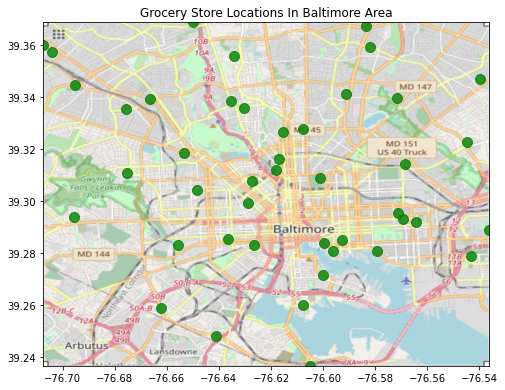

In [42]:
# preparing to plot
## Setting up a Bounding Box that includes all geographical points
BBox = ((df3.Longitude.min(), df3.Longitude.max(), df3.Latitude.min(), df3.Latitude.max()))

## Importing Image from opestreetmap.org
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
balt_img = mpimg.imread('Baltimore_Area.png')


# Plotting lat and long on image
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df3.Longitude, df3.Latitude, zorder=1, alpha= 0.8, c='g', s=100)
ax.set_title('Grocery Store Locations In Baltimore Area')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(balt_img, zorder=0, extent = BBox, aspect= 'equal')